***Installing packages***

In [ ]:
!pip install geostatspy

In [ ]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python

In [ ]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import scipy.signal as signal             # kernel for moving window calculation
import random                             # for randon numbers
import seaborn as sns                     # for matrix scatter plots
from sklearn.impute import SimpleImputer  # basic imputation method
from sklearn.impute import KNNImputer     # k-nearest neighbour imputation method
from sklearn.experimental import enable_iterative_imputer # required for MICE imputation
from sklearn.impute import IterativeImputer # MICE imputation

***Initial collinearity check and visualization***

In [ ]:
df = pd.read_csv(r'/content/HackathonData2024.csv')
# df = df.drop(['Prod'],axis = 1)

df.head(n=13)

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.93,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.7,2719.898438,472.4
1,2,-8.45,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.9,2934.885325,747.4
2,3,8.70,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,Middle,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.8,1589.948673,596.9
3,4,NaN,Arches,11000,Campbell,10555.0,Coke,1,11110000,Edge,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.7,1304.162878,551.5
4,5,19.93,Badlands,2300,Campbell,9295.0,Mountain Dew,1,10001101,Edge,...,277,1.0,1.0,2,0.503327,336,NaN,NaN,NaN,NaN
5,6,-4.34,Big Bend,12300,Campbell,10355.0,Coke,1,11110000,Edge,...,1410,21.5,28.5,4,0.565200,21,2963.567911,232.0,2063.408619,517.8
6,7,0.54,Big Bend,12600,Campbell,8120.0,Orange Crush,1,10101111,Edge,...,177,-0.7,-1.0,3,0.561294,34,2814.617107,296.9,2330.939138,471.2
7,8,66.52,Arches,11000,Campbell,10560.0,Coke,1,11111000,Edge,...,29,-0.5,-0.5,2,0.493534,135,2697.576560,222.9,1975.744979,707.7
8,9,3.39,Big Bend,12900,Campbell,10345.0,Coke,1,11111000,Edge,...,36,0.0,0.0,1,0.560111,227,2892.427934,248.5,2235.448950,698.1
9,10,13.78,Canyonlands,10000,Campbell,8335.0,Mountain Dew,0,10001001,Middle,...,21,7.1,16.0,7,0.540762,21,2763.612613,159.2,1671.514259,287.2


<ipython-input-15-19da9b462459>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-15-19da9b462459>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)


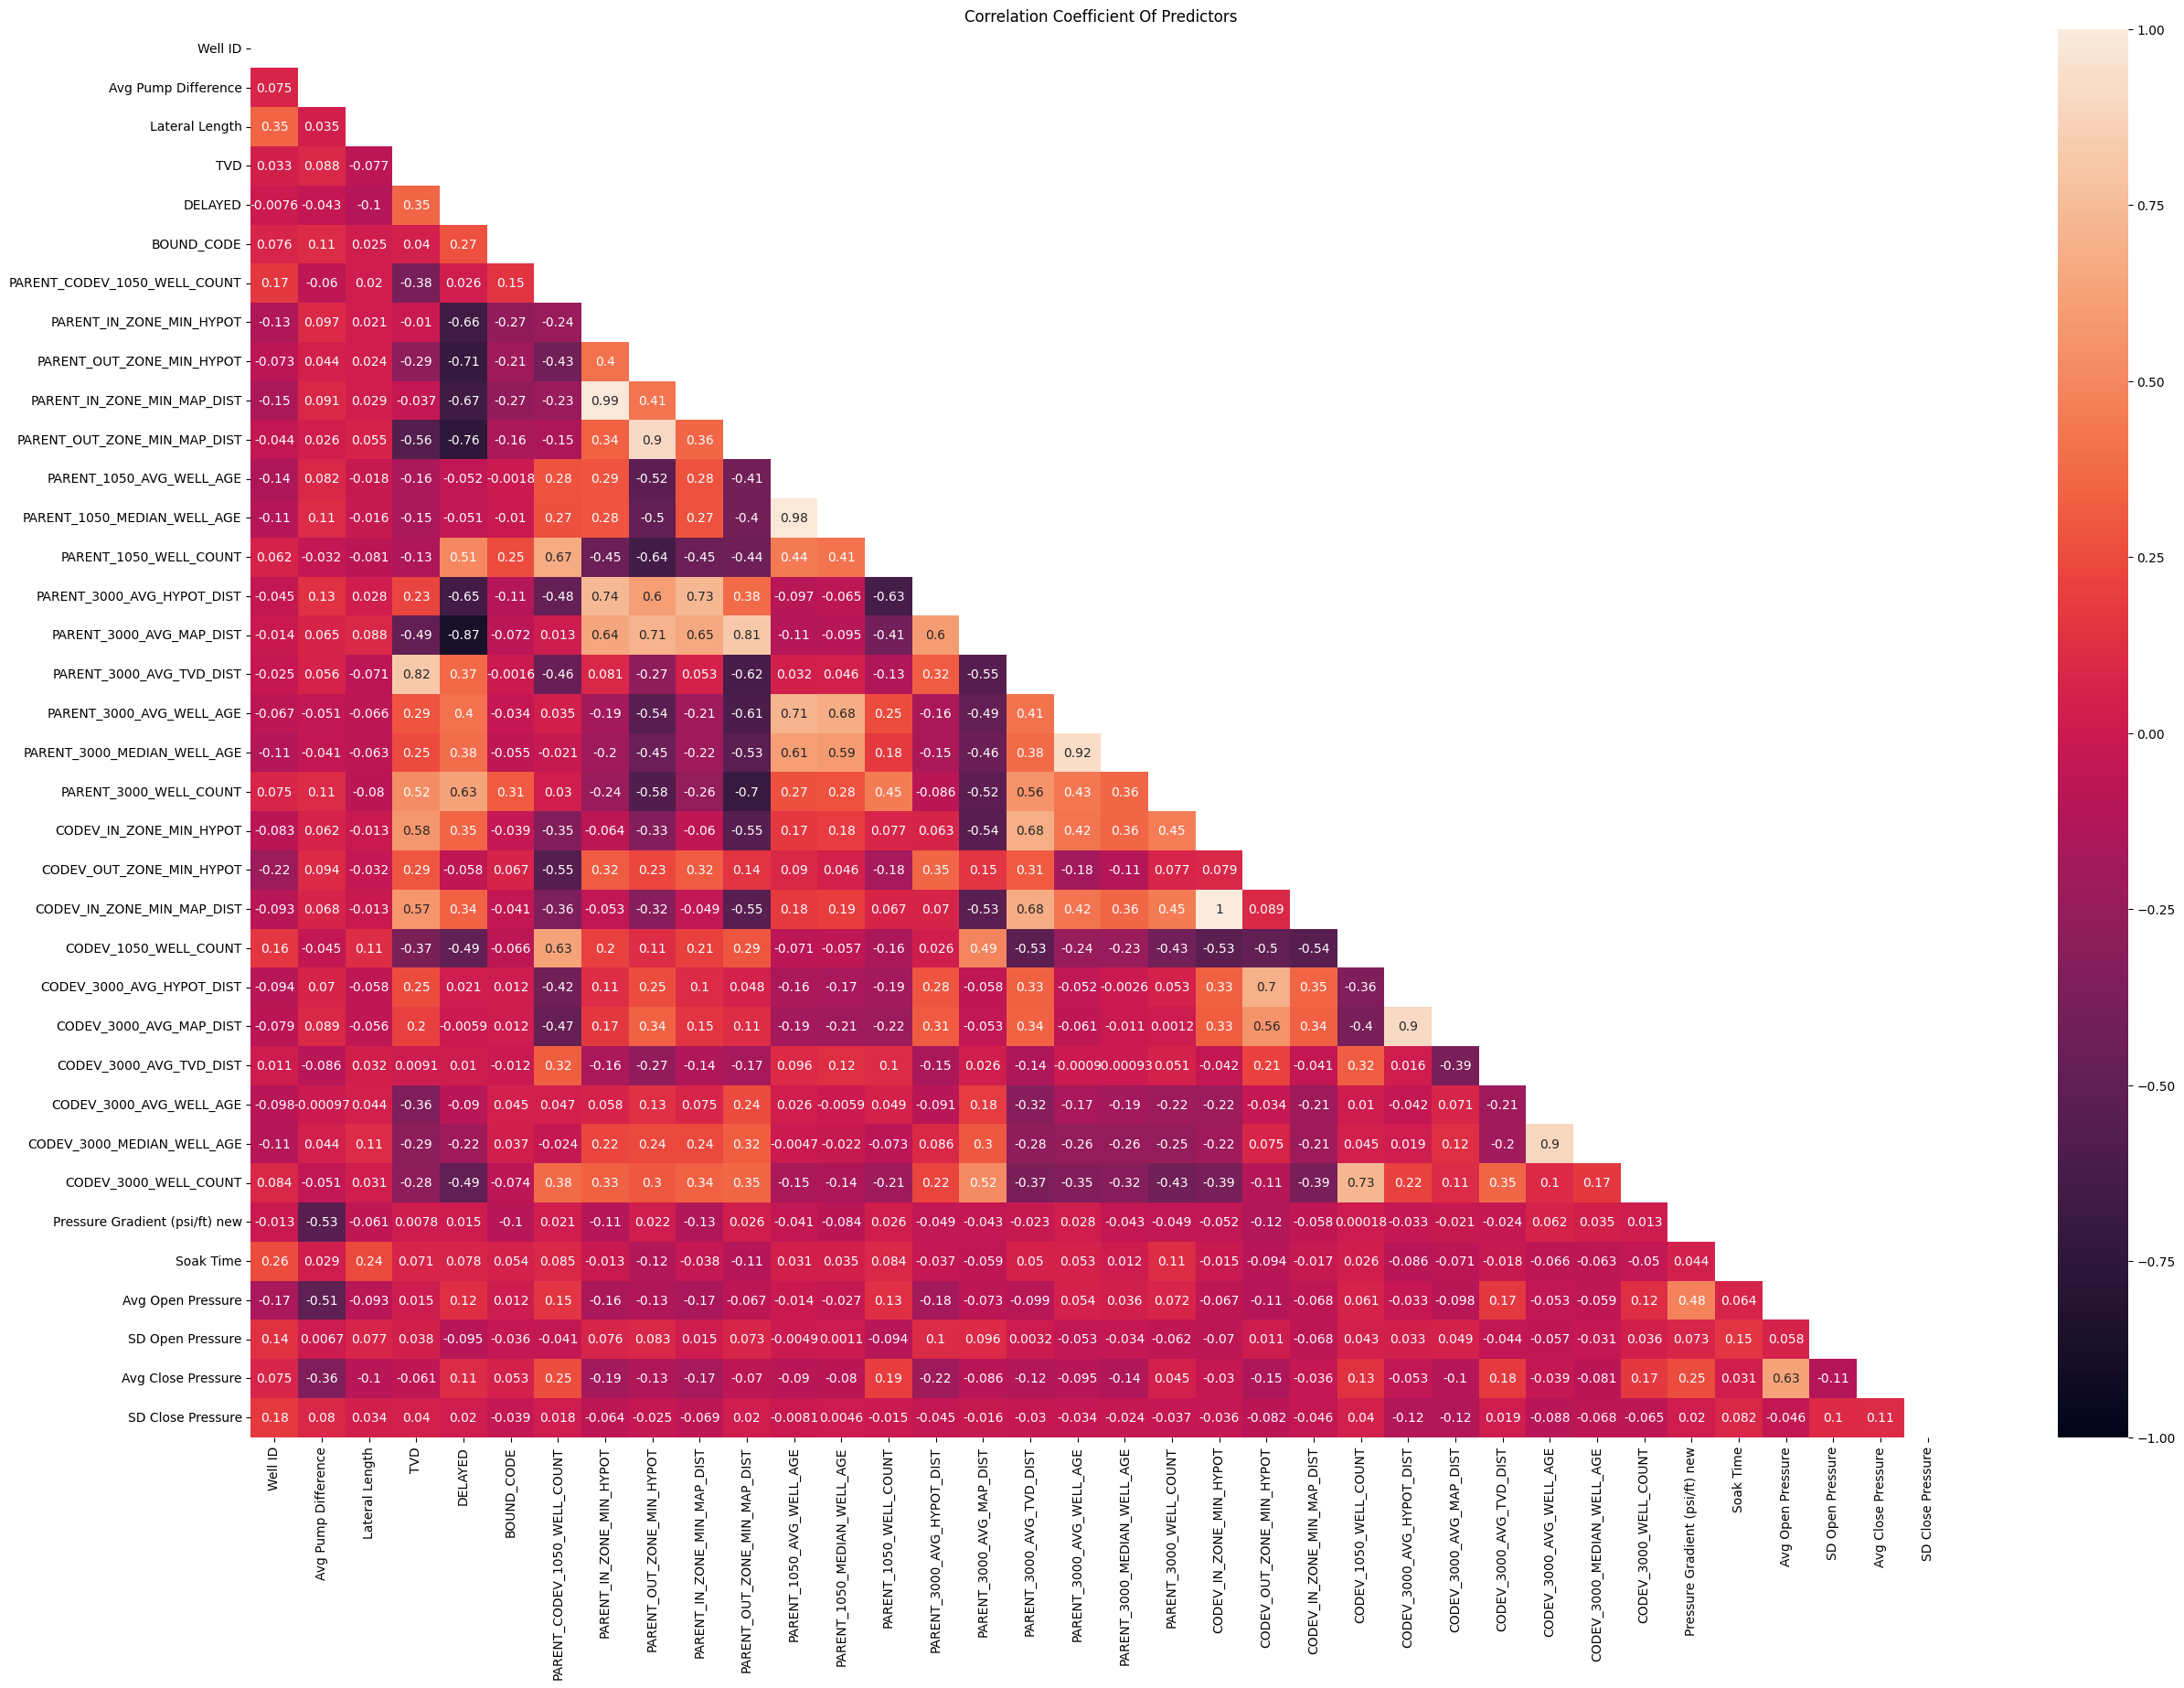

In [ ]:
# set figure size
plt.figure(figsize=(30,20))


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

** Credit for Collinearity chart layout to Bibor Szabo --> [Link](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

***Post-Update Colinearity***

In [ ]:
df_updated = pd.read_csv(r'/content/HackathonData2024_updated.csv')
# df = df.drop(['Prod'],axis = 1)

df_updated.head(n=13)

,Well ID,Avg Pump Difference,Area,Lateral Length,Fluid System,TVD,Development Strategy,DELAYED,BOUND_CODE,CODEV_POSITION,...,CODEV_3000_AVG_TVD_DIST,CODEV_3000_AVG_WELL_AGE,CODEV_3000_MEDIAN_WELL_AGE,CODEV_3000_WELL_COUNT,Pressure Gradient (psi/ft) new,Soak Time,Avg Open Pressure,SD Open Pressure,Avg Close Pressure,SD Close Pressure
0,1,-0.930000,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.593758,34,3304.124833,261.700000,2719.898438,472.400000
1,2,-8.450000,Acadia,10300,Campbell,10415.0,Coke,1,11100000,Edge,...,4,0.0,0.0,1,0.597059,67,3301.199254,255.900000,2934.885325,747.400000
2,3,8.700000,Arches,11000,Campbell,8470.0,Orange Crush,0,101111,Middle,...,682,4.5,0.0,11,0.516873,34,2774.407080,184.800000,1589.948673,596.900000
3,4,22.464054,Arches,11000,Campbell,10555.0,Coke,1,11110000,Edge,...,4,0.0,0.0,1,0.501287,30,2653.539415,206.700000,1304.162878,551.500000
4,5,19.930000,Badlands,2300,Campbell,9295.0,Mountain Dew,1,10001101,Edge,...,277,1.0,1.0,2,0.503327,336,2824.373050,242.944118,2267.651835,568.830836
5,6,-4.340000,Big Bend,12300,Campbell,10355.0,Coke,1,11110000,Edge,...,1410,21.5,28.5,4,0.565200,21,2963.567911,232.000000,2063.408619,517.800000
6,7,0.540000,Big Bend,12600,Campbell,8120.0,Orange Crush,1,10101111,Edge,...,177,-0.7,-1.0,3,0.561294,34,2814.617107,296.900000,2330.939138,471.200000
7,8,66.520000,Arches,11000,Campbell,10560.0,Coke,1,11111000,Edge,...,29,-0.5,-0.5,2,0.493534,135,2697.576560,222.900000,1975.744979,707.700000
8,9,3.390000,Big Bend,12900,Campbell,10345.0,Coke,1,11111000,Edge,...,36,0.0,0.0,1,0.560111,227,2892.427934,248.500000,2235.448950,698.100000
9,10,13.780000,Canyonlands,10000,Campbell,8335.0,Mountain Dew,0,10001001,Middle,...,21,7.1,16.0,7,0.540762,21,2763.612613,159.200000,1671.514259,287.200000


Heatmap of Colinearity AFTER the feature selection due to missing information

<ipython-input-13-4ada57f4ef57>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_updated.corr(), dtype=bool))
<ipython-input-13-4ada57f4ef57>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_updated.corr(), annot=True, mask=mask, vmin=-1, vmax=1)


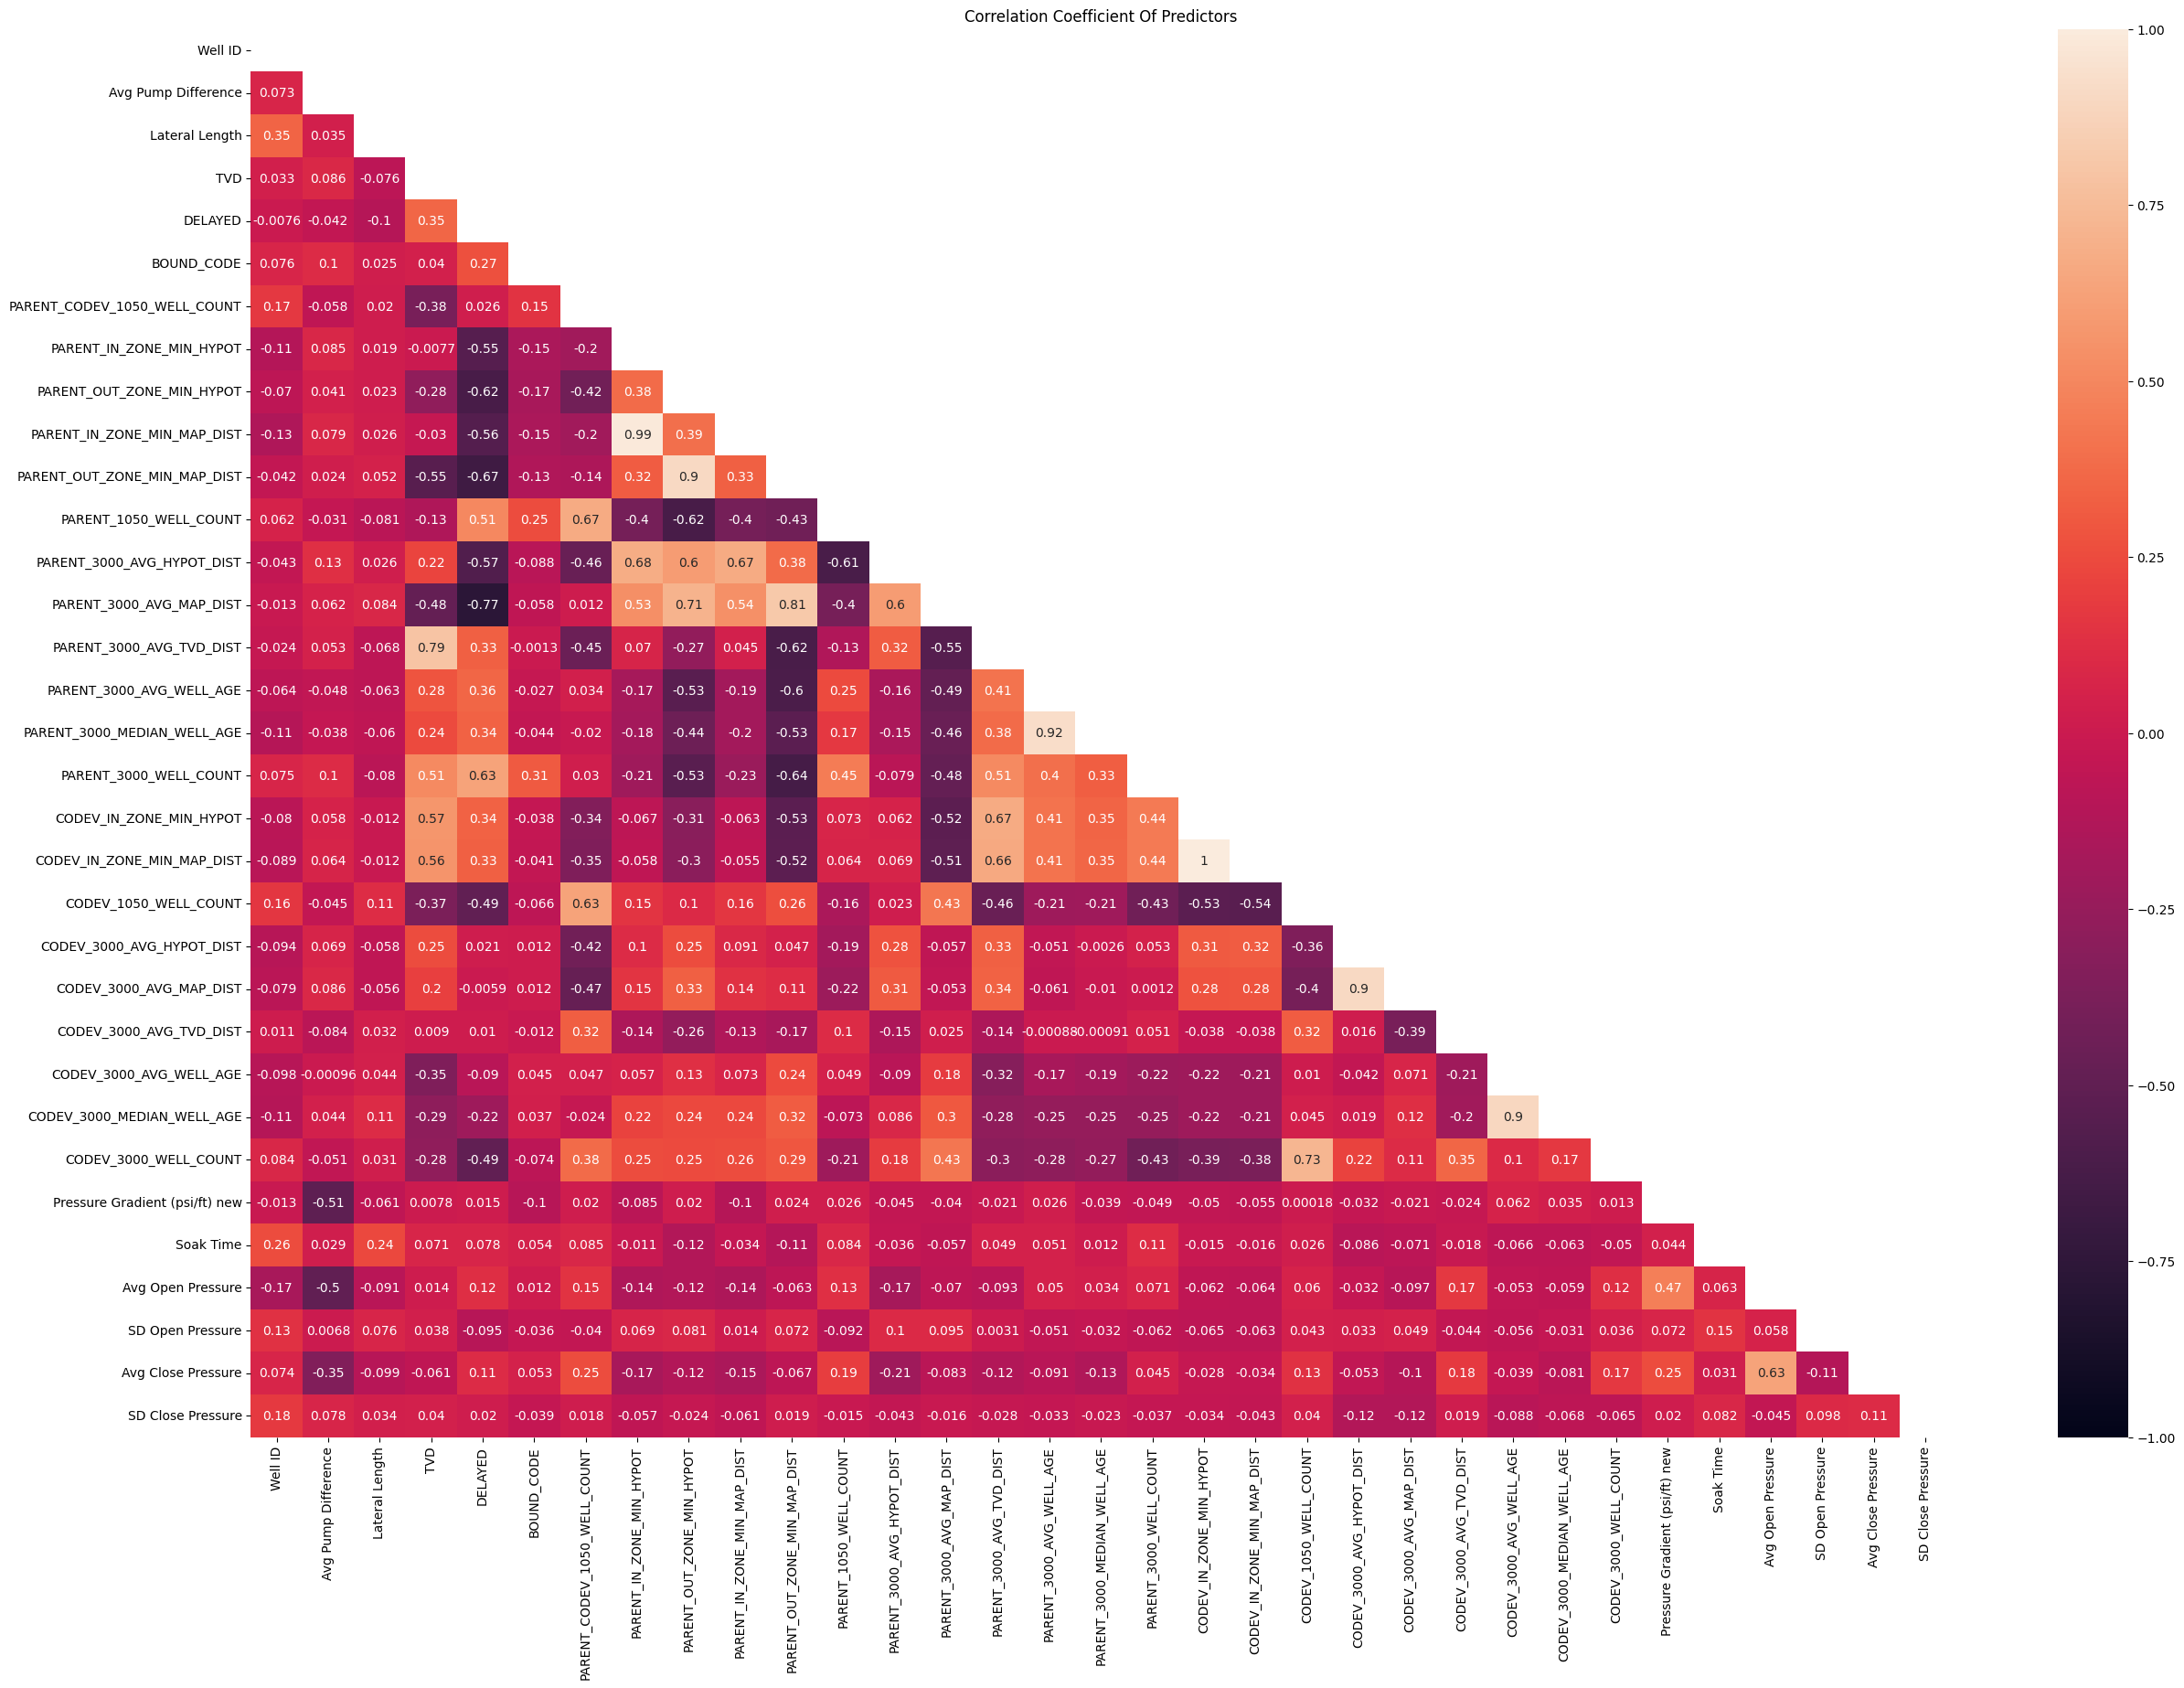

In [ ]:
# set figure size
plt.figure(figsize=(30,20))


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_updated.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df_updated.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

*   vmin = -1 --> vmin = 0
*   Made all of the values absolute measures

<ipython-input-14-969573045d9c>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df_updated.corr(), dtype=bool))
<ipython-input-14-969573045d9c>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df_updated.corr()), annot=True, mask=mask, vmin=0, vmax=1)


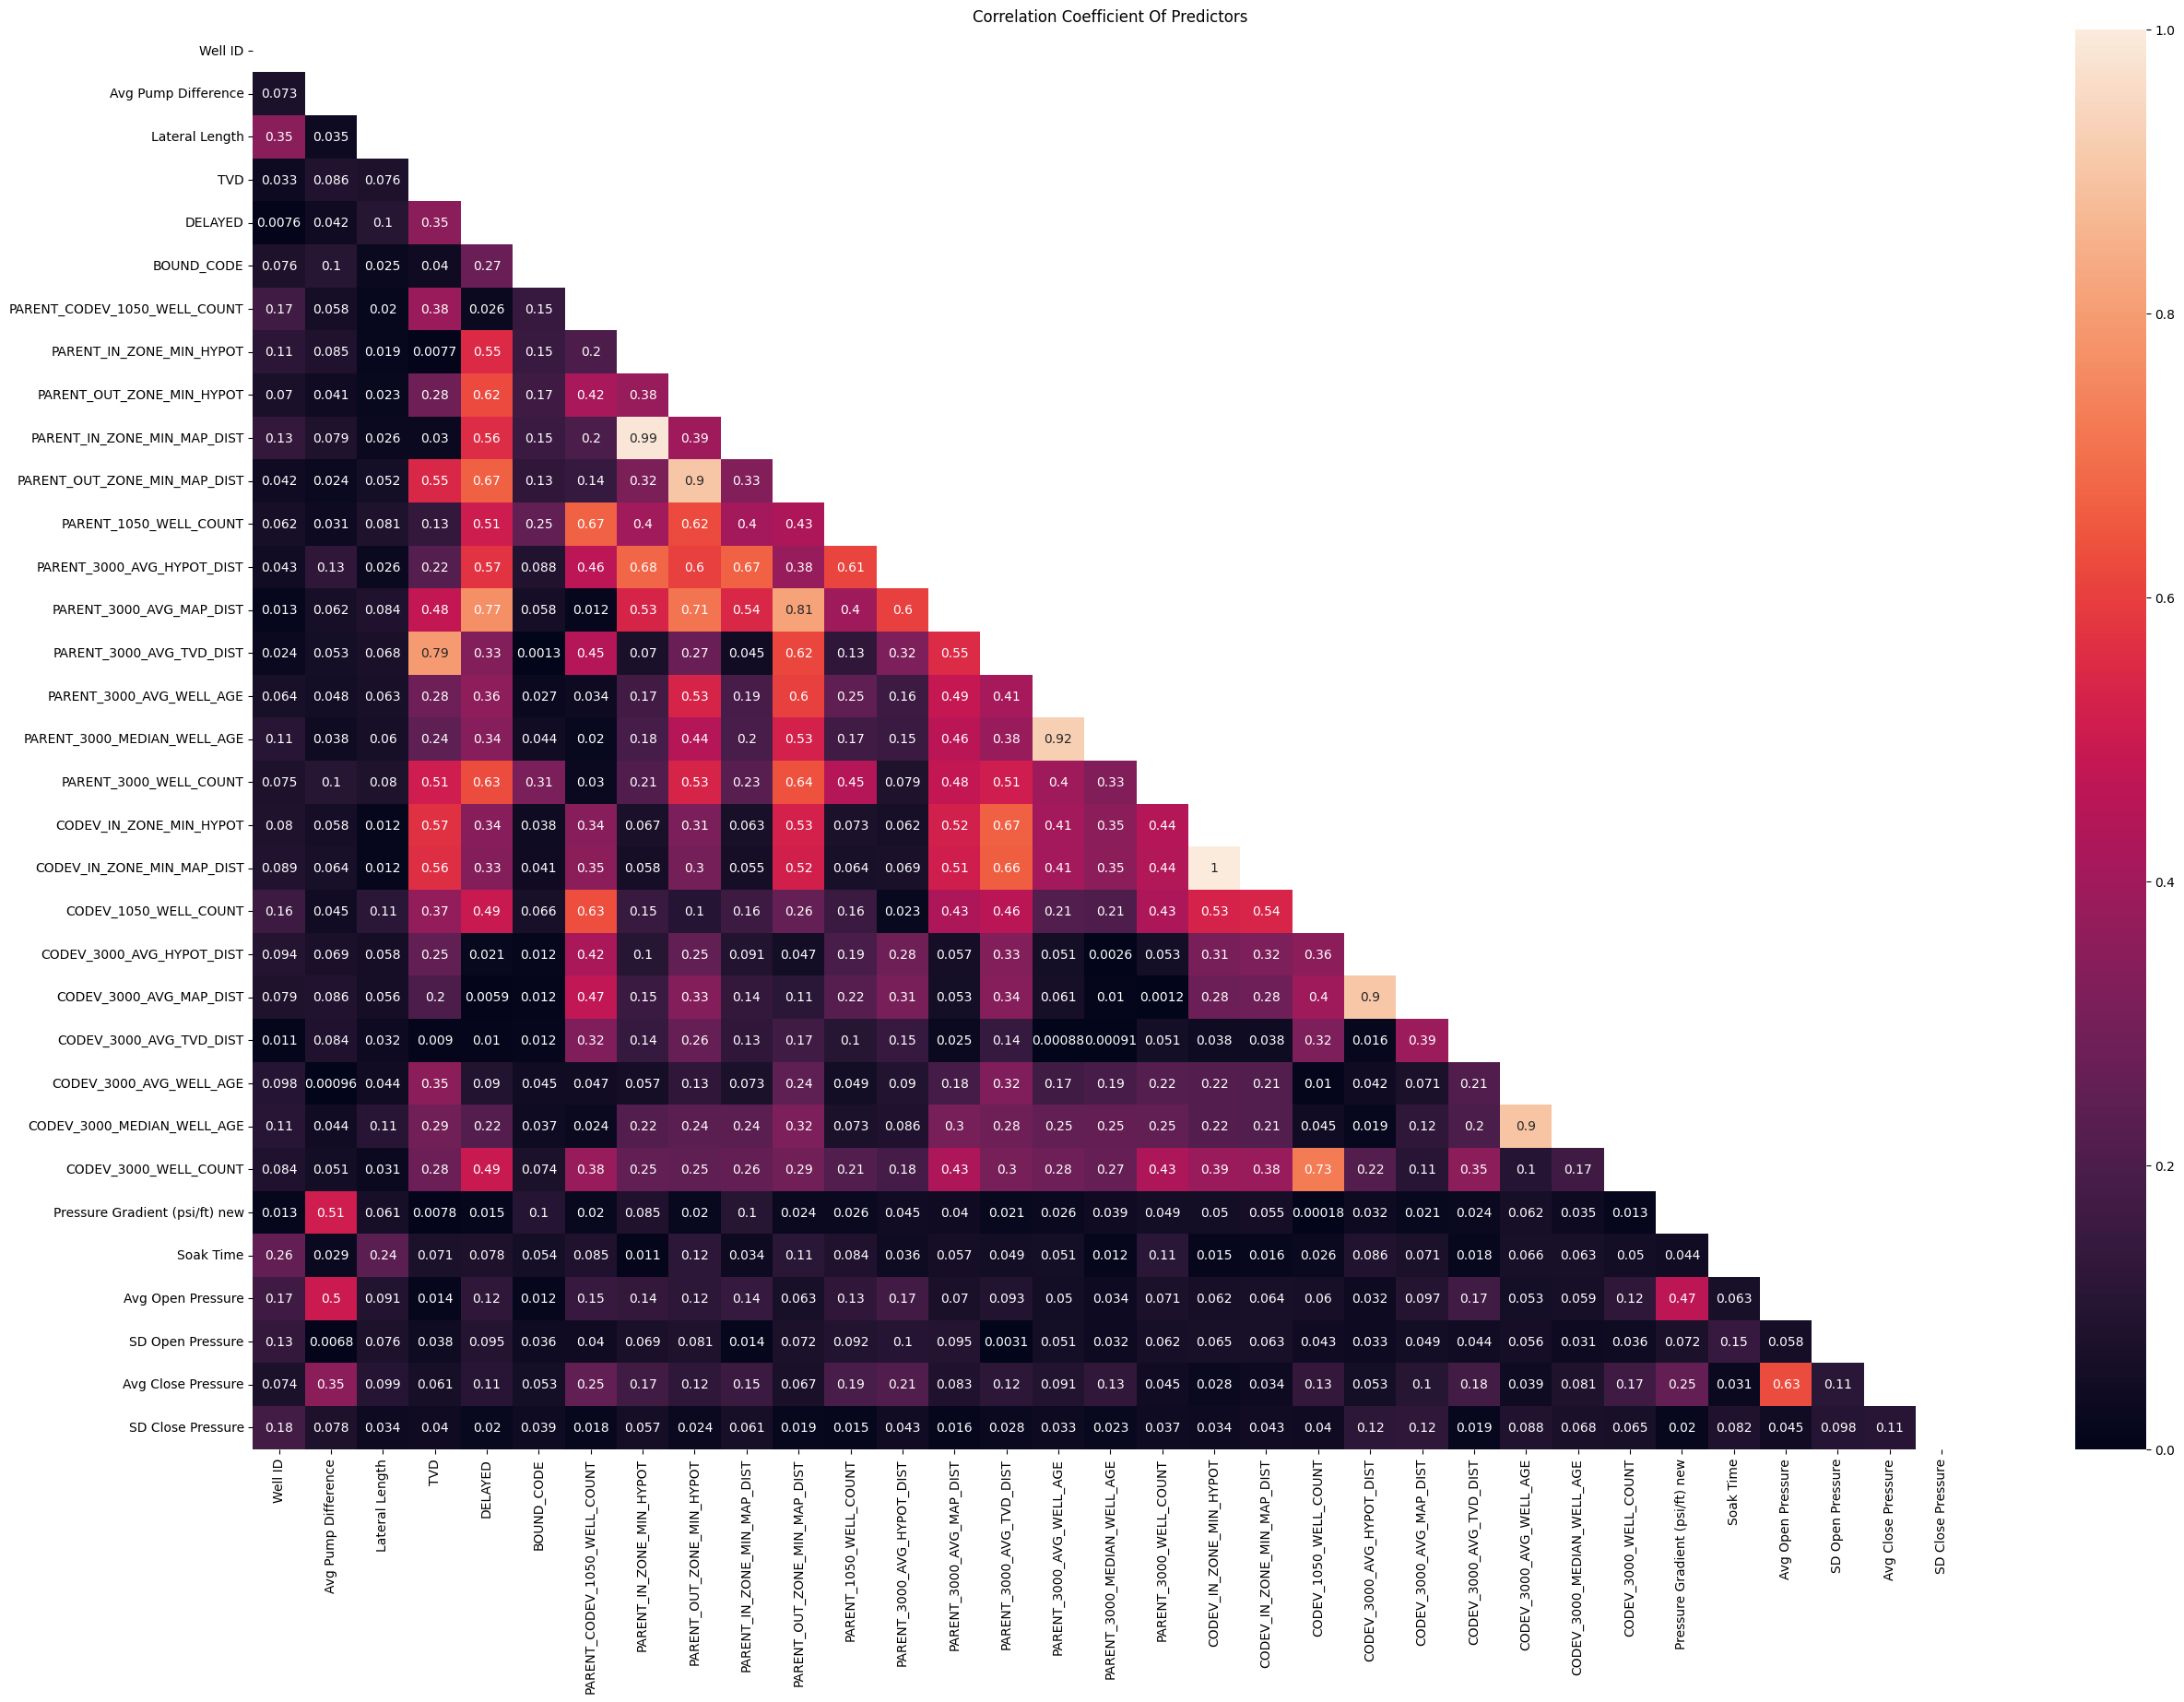

In [ ]:
# set figure size
plt.figure(figsize=(30,20))


# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df_updated.corr(), dtype=bool))

# generate heatmap
sns.heatmap(abs(df_updated.corr()), annot=True, mask=mask, vmin=0, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Citation:
Pyrcz, "Feature Selection for Subsurface Data Analytics in Python", Jan. 21 2024